<a href="https://colab.research.google.com/github/SarahSouzaPontes/tunagem/blob/main/Tunagem_Hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importação via github dados
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS/main/Datasets/insurance.csv'
dados = pd.read_csv(url)
dados.head()
#insure dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#PRE PROCESSSAMENTO
# mise un place completo - pré-processamento dos dados
#FUMANTE  OU 0
#continuas foram normalizadas
#dummies sexo, filhos e regiao
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/max(dados['charges']) 
dados['age'] = dados['age']/max(dados['age'])   
dados['bmi'] = dados['bmi']/max(dados['bmi'])   
dados = pd.get_dummies(dados, columns = ['sex', 'children', 'region'], drop_first = True)
dados.head()

,age,bmi,smoker,charges,sex_male,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,0.296875,0.525127,1,0.264777,0,0,0,0,0,0,0,0,1
1,0.281250,0.635611,0,0.027059,1,1,0,0,0,0,0,1,0
2,0.437500,0.621118,0,0.069773,1,0,0,1,0,0,0,1,0
3,0.515625,0.427348,0,0.344744,1,0,0,0,0,0,1,0,0
4,0.500000,0.543572,0,0.060637,1,0,0,0,0,0,1,0,0


In [ ]:
# separação de variáveis preditoras e variával resposta 
X = dados.drop('smoker', axis = 1)
y = dados['smoker']
#y variavel resposta

TUNAGEM

In [ ]:
#importando bibliotecas
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#listagem de parametros- dicionario, nome do parametros e associado todos valoes de  a 50 de 2 a 2 excluso o 50
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [ ]:
modelo = KNeighborsClassifier()
        
parametros = { 'n_neighbors' : np.arange(1, 50, 2) }

grid_search = GridSearchCV(modelo, param_grid = parametros,
                           #metrica
                                   scoring = 'accuracy', 
                           #processodevalidacao
                                   cv = validacao, 
                                   verbose = 1,
                           #verbose é paracontrolar os níveis de prints
                                   n_jobs = -1)
#processamento paralelo na maquina = a -1 quer dizer que use todos, na maquina nao é muito interessante, apenas no COLAB, pois pode travar a maq

grid_search.fit(X, y)


Fitting 30 folds for each of 25 candidates, totalling 750 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9334867018291998

In [ ]:
grid_search.cv_results_['mean_test_score']

array([0.9334867 , 0.90981745, 0.89338271, 0.88142932, 0.87394232,
       0.87170164, 0.86397524, 0.85675008, 0.85276998, 0.84703737,
       0.83906408, 0.83009763, 0.82238058, 0.81639921, 0.81515917,
       0.81515356, 0.81191598, 0.81091722, 0.81066846, 0.80693525,
       0.80668462, 0.80618524, 0.80593648, 0.80668462, 0.80768152])

In [ ]:
grid_search.best_params_
#numero ideal de vizinhos
#maldição da dimensionalidade

{'n_neighbors': 1}

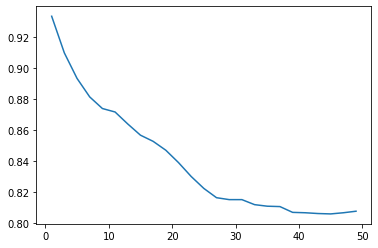

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 50, 2), grid_search.cv_results_['mean_test_score']);

In [ ]:
grid_search.best_params_
#melhor desempenho

{'n_neighbors': 1}

In [ ]:
random_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                   scoring = 'accuracy', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_iter = 10,
                                   n_jobs = -1)

random_search.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
                   scoring='accuracy', verbose=1)

In [ ]:
random_search.cv_results_['mean_test_score']

array([0.82684884, 0.80766468, 0.80816594, 0.85251936, 0.89810347,
       0.88365503, 0.81340478, 0.8074178 , 0.83134515, 0.81465604])

In [ ]:
random_search.best_score_

0.8981034676242845

In [ ]:
random_search.best_params_
#alguns elementos selecionados de forma randomica

{'n_neighbors': 5}

In [ ]:
def Tunagem(modelo, treino, targets, parametros, tipo = 'grid', metrica = 'accuracy', n_iter = 20):
 
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = metrica, cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = metrica, cv = validacao,
                                n_iter = n_iter, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor

In [ ]:
parametros = {  'n_neighbors' : np.arange(1, 50, 2)  }

modelo = KNeighborsClassifier()

knn = Tunagem(modelo, X, y, parametros, tipo = 'random')

Fitting 30 folds for each of 20 candidates, totalling 600 fits

Acuracia: 0.9325
Melhores parâmetros: {'n_neighbors': 1}



In [ ]:
np.arange(2,21,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [ ]:
#arvore de decisao
#radom forest
parametros = {   
              'max_depth' : np.arange(1,11), 
              #profundidade
              'min_samples_split': np.arange(2,21,2),
              #variando de 2 a 20 de  em 2
              'min_samples_leaf': np.arange(1,11),
              #num minimo em folha
                 }

modelo = DecisionTreeClassifier()

arvore = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 50)
arvore
#30mil ajustes para concluir a tunagem

Fitting 30 folds for each of 50 candidates, totalling 1500 fits

Acuracia: 0.9644
Melhores parâmetros: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 9}



DecisionTreeClassifier(max_depth=9, min_samples_leaf=3)

In [ ]:
parametros = {   
    #3 primeiros random forest demais quantas arvores individual vai poder olhar
                 'n_estimators': [50, 100, 150],
                 'max_features': [2,3,4,5],
                 'bootstrap': [True, False] ,     
              #profundidade 
                 'max_depth' : [2, 4, 6, 8, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5]
                 }

modelo = RandomForestClassifier()

rf = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 5)
rf

Fitting 30 folds for each of 5 candidates, totalling 150 fits

Acuracia: 0.9659
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10, 'bootstrap': True}



RandomForestClassifier(max_depth=10, max_features=5, n_estimators=150)